# AI4ME | AI for Marine Ecosystems API Demo
AI/ML API for marine ecosystem research computer vision models. Provides machine learning-based image analysis tools for marine research, including coral bleaching classification and sea urchin detection.
- API Link: https://connect.fisheries.noaa.gov/ai4me

🌊 Contact:
- Contact: Michael.Akridge@noaa.gov

🔎 Features:
- Platform-Agnostic: Accessible via Python, R, command-line, shell, or any HTTP client.
- Secure: Requires an API key for restricted endpoints.
- Scalable & Fast: Leverages optimized YOLO models for rapid predictions that run on CPU.
- Supports Image Uploads: Accepts images up to 20MB.
- Research-Focused: Designed for marine ecosystem analysis.

API Endpoints:
- Coral bleaching classification (/predict/coral)
- Sea urchin object detection (/predict/urchin)

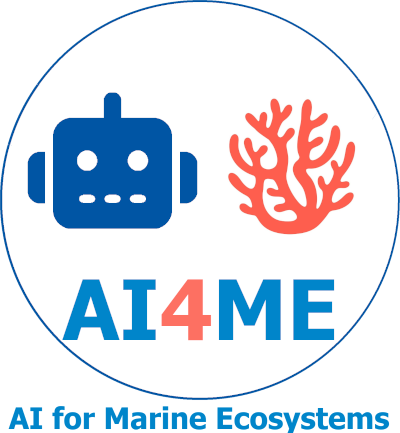

🔑 Access:
- Public: /health and /info (no API key needed)
- Locked: /predict/coral and /predict/urchin (API key required)


---



# Example: Use API with Python to detect urchins

---



Enter your API key: ··········
Response status: 200
Response text: {"model":"sea_urchin_detector","detections":[{"class":"urchin","confidence":0.8505,"bbox":[2974.38,765.22,3528.17,1394.35]},{"class":"urchin","confidence":0.7354,"bbox":[4257.12,2783.82,4684.24,3146.24]},{"class":"urchin","confidence":0.5763,"bbox":[4879.12,3000.89,5229.92,3388.92]}]}


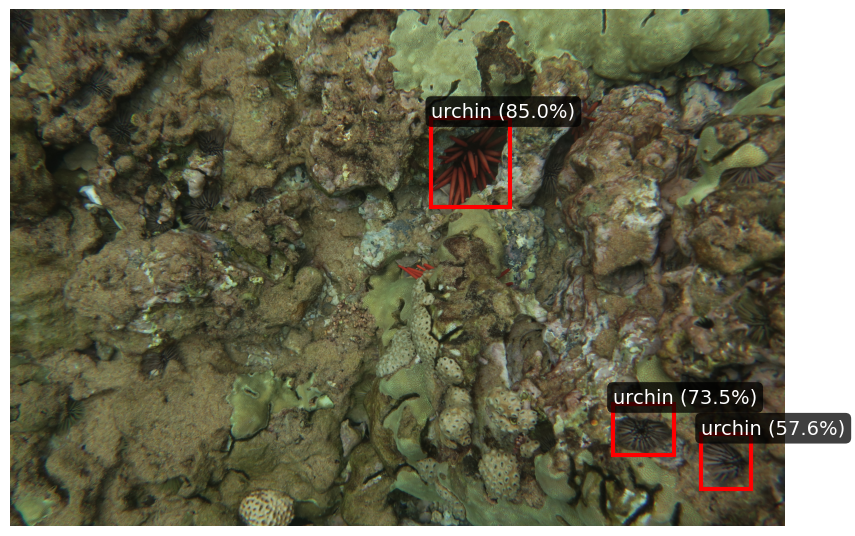

In [3]:
import requests
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import io
import getpass

# -------------------------------
# Setup form for API key
# -------------------------------
API_KEY = getpass.getpass("Enter your API key: ")

# -------------------------------
# Config
# -------------------------------
API_BASE_URL = "https://connect.fisheries.noaa.gov/ai4me"
URCHIN_ENDPOINT = f"{API_BASE_URL}/predict/urchin"

# -------------------------------
# Function to display detections
# -------------------------------
def display_urchin_detections(image_path):
    headers = {"X-API-KEY": API_KEY}

    # Handle local vs. remote image
    if image_path.startswith("http"):
        r = requests.get(image_path)
        r.raise_for_status()
        file_obj = io.BytesIO(r.content)
    else:
        file_obj = open(image_path, "rb")

    files = {"file": file_obj}
    response = requests.post(URCHIN_ENDPOINT, headers=headers, files=files)

    # Print response for debugging
    print("Response status:", response.status_code)
    print("Response text:", response.text)

    if response.status_code == 200:
        detections = response.json().get("detections", [])
        image = Image.open(file_obj)

        # Create Matplotlib figure
        fig, ax = plt.subplots(figsize=(10, 10))
        ax.imshow(image)

        for det in detections:
            bbox = det["bbox"]
            cls = det["class"]
            confidence = det["confidence"]
            label = f"{cls} ({confidence*100:.1f}%)"

            # Extract bbox coordinates
            x_min, y_min, x_max, y_max = bbox
            width, height = x_max - x_min, y_max - y_min

            # Draw bounding box
            rect = patches.Rectangle((x_min, y_min), width, height, linewidth=3, edgecolor='red', facecolor='none')
            ax.add_patch(rect)

            # Add label with background
            ax.text(x_min, y_min - 5, label, fontsize=14, color="white",
                    bbox=dict(facecolor='black', alpha=0.75, edgecolor='none', boxstyle="round,pad=0.3"))

        ax.axis("off")
        plt.show()
    else:
        print("Request failed:", response.text)

    if not image_path.startswith("http"):
        file_obj.close()

# -------------------------------
# Run Test
# -------------------------------
display_urchin_detections("https://storage.googleapis.com/nmfs_odp_pifsc/PIFSC/ESD/ARP/data_management/temp/example_urchin.jpg")


# Example: Use API with Python to classify coral health (bleaching)

Enter your API key: ··········
Response status: 200
Response text: {"model":"coral_bleaching_classifier","predictions":[{"class":"CORAL_BL","confidence":0.9989}]}


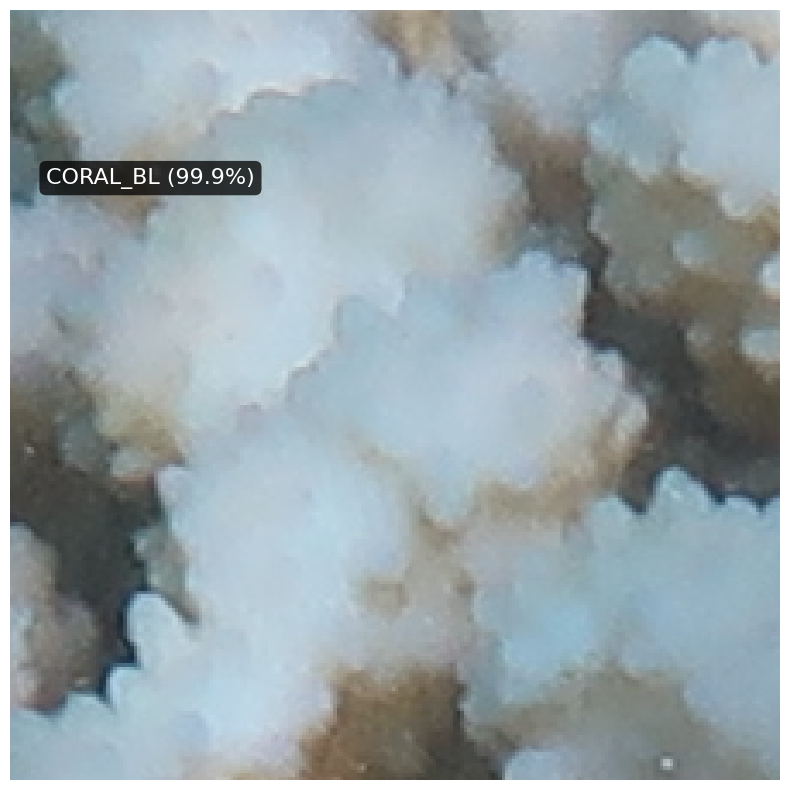

In [6]:
import requests
from PIL import Image
import matplotlib.pyplot as plt
import getpass
import io

# -------------------------------
# Setup form for API key
# -------------------------------
API_KEY = getpass.getpass("Enter your API key: ")

# -------------------------------
# Config
# -------------------------------
API_BASE_URL = "https://connect.fisheries.noaa.gov/ai4me"
CORAL_ENDPOINT = f"{API_BASE_URL}/predict/coral"

# -------------------------------
# Function to send image & display results
# -------------------------------
def classify_coral_bleaching(image_path):
    headers = {"X-API-KEY": API_KEY}

    # Handle local vs. remote image
    if image_path.startswith("http"):
        r = requests.get(image_path)
        r.raise_for_status()
        file_obj = io.BytesIO(r.content)
    else:
        file_obj = open(image_path, "rb")

    files = {"file": file_obj}
    response = requests.post(CORAL_ENDPOINT, headers=headers, files=files)

    # Print response for debugging
    print("Response status:", response.status_code)
    print("Response text:", response.text)

    if response.status_code == 200:
        predictions = response.json().get("predictions", [])
        image = Image.open(file_obj)

        # Create Matplotlib figure
        fig, ax = plt.subplots(figsize=(10, 10))
        ax.imshow(image)

        # Display each prediction
        y_offset = 50
        for pred in predictions:
            label = f"{pred['class']} ({pred['confidence']*100:.1f}%)"
            ax.text(10, y_offset, label, fontsize=16, color="white",
                    bbox=dict(facecolor='black', alpha=0.75, edgecolor='none', boxstyle="round,pad=0.3"))
            y_offset += 40  # Increase offset for next label

        ax.axis("off")
        plt.show()
    else:
        print("Request failed:", response.text)

    if not image_path.startswith("http"):
        file_obj.close()

# -------------------------------
# Run Test
# -------------------------------
classify_coral_bleaching("https://storage.googleapis.com/nmfs_odp_pifsc/PIFSC/ESD/ARP/data_management/temp/example_coral.png")

⚠️ Usage Disclaimer:
This API is for research and educational purposes only.

Use responsibly; predictions are not a substitute for expert analysis.

This is a scientific product and is not official communication of the National Oceanic and Atmospheric Administration, or the United States Department of Commerce. All project content is provided on an as is basis and the user assumes responsibility for its use. Any claims against the Department of Commerce or Department of Commerce bureaus stemming from the use of this project will be governed by all applicable Federal law. Any reference to specific commercial products, processes, or services by service mark, trademark, manufacturer, or otherwise, does not constitute or imply their endorsement, recommendation or favoring by the Department of Commerce. The Department of Commerce seal and logo, or the seal and logo of a DOC bureau, shall not be used in any manner to imply endorsement of any commercial product or activity by DOC or the United States Government.